In [ ]:
import  pandas as pd
# used for making data-frames(structured table) #data will be in csv file

In [ ]:
df = pd.read_csv('/content/IndianFinancialNews.csv', encoding='ISO-8859-1')
# encoding='ISO-8859-1': This parameter specifies the character encoding to be used while reading the CSV file
# it can handle characters that are not in the ASCII character set
# ISO 8859-1 is a single-byte encoding that can represent the first 256 Unicode characters. unlike UTF-8 which is a multibyte encoding that can represent any Unicode character.

In [ ]:
df
# this is used to display the first few rows (by deafault 5)

,Date,Description
0,2020-05-26,"ATMs to become virtual bank branches, accept d..."
1,2020-05-26,IDFC First Bank seniors to forgo 65% of bonus ...
2,2020-05-25,"Huge scam in YES Bank for many years, says Enf..."
3,2020-05-24,"Bank of Maharashtra sanctioned Rs 2,789 cr in ..."
4,2020-05-23,DCB Bank's profit before tax declines 37.6% to...
...,...,...
49994,2003-02-11,Lic Mops Up Government Securities As Prices Cr...
49995,2003-02-11,Banks Plan To Raise Lending Rates Without Alte...
49996,2003-02-10,"Net Scheduled Inflows Of Rs 1,559.9 Crore Net ..."
49997,2003-02-10,Rbi Calls Meet To Push Floating Rate Deposits ...


**DATA PRE-PROCESSING**

In [ ]:
import pandas as pd
# used for making data-frames(structured table) #data will be in csv file
from textblob import TextBlob
#for natural language processing tasks like sentiment analysis and text classification

In [ ]:
# Load the dataset from CSV file
df = pd.read_csv("/content/IndianFinancialNews.csv")

In [ ]:
# Define a function to analyze sentiment which will take descriptionof each row as an input and return a label according to that

def analyze_sentiment(description):
    blob = TextBlob(description) #create a TextBlob object for the input text description
    sentiment_score = blob.sentiment.polarity
    # calculates the polarity of the text using TextBlob's sentiment analysis.
    # The polarity ranges from -1 (very negative) to 1 (very positive). Values closer to 0 indicate neutrality.
    if sentiment_score >= 0:
        return 1  # Positive or neutral sentiment
    else:
        return 0  # Negative sentiment

# This function applies the analyze_sentiment function defined earlier to each description in the DataFrame df
# and adds a new column called 'Label' containing the sentiment analysis result.

def add_sentiment_label(df):
    df['Label'] = df['Description'].apply(analyze_sentiment) # assign the sentiment computed previously to a new column called 'Label' in the df.
    return df[['Date', 'Label', 'Description']]  # return a subset of the DataFrame containing only the 'Date', 'Label', and 'Description' columns

# Apply sentiment analysis and add label column
df_with_label = add_sentiment_label(df)

In [ ]:
# Display the updated DataFrame
df = df_with_label
print(df)
df.head(7)

             Date  Label                                        Description
0      2020-05-26      1  ATMs to become virtual bank branches, accept d...
1      2020-05-26      1  IDFC First Bank seniors to forgo 65% of bonus ...
2      2020-05-25      1  Huge scam in YES Bank for many years, says Enf...
3      2020-05-24      1  Bank of Maharashtra sanctioned Rs 2,789 cr in ...
4      2020-05-23      1  DCB Bank's profit before tax declines 37.6% to...
...           ...    ...                                                ...
49994  2003-02-11      1  Lic Mops Up Government Securities As Prices Cr...
49995  2003-02-11      1  Banks Plan To Raise Lending Rates Without Alte...
49996  2003-02-10      1  Net Scheduled Inflows Of Rs 1,559.9 Crore Net ...
49997  2003-02-10      1  Rbi Calls Meet To Push Floating Rate Deposits ...
49998  2003-02-10      1  Sticky Loans Divide Consortiums Sticky Loans D...

[49999 rows x 3 columns]


,Date,Label,Description
0,2020-05-26,1,"ATMs to become virtual bank branches, accept d..."
1,2020-05-26,1,IDFC First Bank seniors to forgo 65% of bonus ...
2,2020-05-25,1,"Huge scam in YES Bank for many years, says Enf..."
3,2020-05-24,1,"Bank of Maharashtra sanctioned Rs 2,789 cr in ..."
4,2020-05-23,1,DCB Bank's profit before tax declines 37.6% to...
5,2020-05-23,1,"Bank of Baroda to advance Rs 12,000 crore to M..."
6,2020-05-22,0,"Retail, MSME loans to get cheaper as RBI cuts ..."


In [ ]:
# combine text data from multiple columns (columns 2 to 26) into a single column named 'Combined' in the DataFrame df.
# Removing punctuations and other unecessary characters


# selects all rows (:) and columns with integer indices from 2 to 26 (exclusive) (0-based indexing) from the train DataFrame
text_columns = df_with_label.iloc[:, 2:3]

# iloc: Integer-location based indexing.

# Applying lambda function to combine text data into a single column

# lambda function =>  user-defined functions but without a name

combine_text = text_columns.apply(
    lambda row: ' '.join([str(val) for val in row]),  # Joining each value in the row into a single string separated by a space
    axis=1  # Applying the function across each row (axis=1)
)

# Assigning the combined text data to a new column 'Combined'
df['Combined'] = combine_text

In [ ]:
# display the first few rows of the DataFrame df with the combined text data column 'Combined' and the corresponding label column 'Label'
print(df[['Combined', 'Label']])

# .head() can be used to print the top 5 and .tail() to print bottom 5

                                                Combined  Label
0      ATMs to become virtual bank branches, accept d...      1
1      IDFC First Bank seniors to forgo 65% of bonus ...      1
2      Huge scam in YES Bank for many years, says Enf...      1
3      Bank of Maharashtra sanctioned Rs 2,789 cr in ...      1
4      DCB Bank's profit before tax declines 37.6% to...      1
...                                                  ...    ...
49994  Lic Mops Up Government Securities As Prices Cr...      1
49995  Banks Plan To Raise Lending Rates Without Alte...      1
49996  Net Scheduled Inflows Of Rs 1,559.9 Crore Net ...      1
49997  Rbi Calls Meet To Push Floating Rate Deposits ...      1
49998  Sticky Loans Divide Consortiums Sticky Loans D...      1

[49999 rows x 2 columns]


In [ ]:
# Assign the combined text data to X
X = df['Combined']
print(X)

0        ATMs to become virtual bank branches, accept d...
1        IDFC First Bank seniors to forgo 65% of bonus ...
2        Huge scam in YES Bank for many years, says Enf...
3        Bank of Maharashtra sanctioned Rs 2,789 cr in ...
4        DCB Bank's profit before tax declines 37.6% to...
                               ...                        
49994    Lic Mops Up Government Securities As Prices Cr...
49995    Banks Plan To Raise Lending Rates Without Alte...
49996    Net Scheduled Inflows Of Rs 1,559.9 Crore Net ...
49997    Rbi Calls Meet To Push Floating Rate Deposits ...
49998    Sticky Loans Divide Consortiums Sticky Loans D...
Name: Combined, Length: 49999, dtype: object


In [ ]:
# Assign the corresponding labels from the 'Label' column to y.
y = df['Label']
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
49994    1
49995    1
49996    1
49997    1
49998    1
Name: Label, Length: 49999, dtype: int64


In [ ]:
import nltk
# Natural Language Toolkit(NLTK), is a suite of libraries and programs for symbolic and statistical natural language processing for English
nltk.download('punkt')
# The Punkt tokenizer is a data-driven sentence tokenizer it divides sentences into a list by using an unsupervised algorithm to build a model
nltk.download('stopwords')
# Stop word removal: Removes the common words in English so that they would not distort tasks such as word frequency analysis

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from keras.preprocessing.text import Tokenizer
# converts text data into sequences or tokenizing text
from sklearn.model_selection import train_test_split
# splits data into training and testing sets
from keras.preprocessing.sequence import pad_sequences
# used for padding sequences to ensure uniform length
from keras.preprocessing.text import text_to_word_sequence
# used for tokenizing text into words
from nltk.corpus import stopwords
# stopwords are words that are typically removed from text during preprocessing because they don't carry much meaning
from nltk.stem import PorterStemmer
# used for stemming words to their root form it is a text normalization technique that reduces words to their base or root form
from nltk.tokenize import word_tokenize
#  it is used for tokenizing text into words.

In [ ]:
# Define function for text preprocessing
def preprocess_text(text):

    # Tokenizes the input text using the word_tokenize function from NLTK, splitting the text into individual tokens
    tokens = word_tokenize(text)

    # removes stopwords from the tokens these are common words ("the","is","and") that often do not carry significant meaning and
    # are removed to focus on the important words in the text
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Stemming reduces words to their root or base form, which can help in reducing the vocabulary size and capturing the core meaning of words
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    # Join tokens back into text
    processed_text = ' '.join(stemmed_tokens)

    return processed_text

# Preprocess text data
X_processed = df['Combined'].apply(preprocess_text)

# Tokenization
tokenizer = Tokenizer()
# initializes a tokenizer object.

tokenizer.fit_on_texts(X_processed)
# fits the tokenizer on the preprocessed text data

X_sequences = tokenizer.texts_to_sequences(X_processed)
# converts the preprocessed text data into sequences of integers.
# Each word in the text is replaced by its corresponding integer index in the tokenizer's word index.
# This step maps each word to its unique integer index in the vocabulary.

X_padded = pad_sequences(X_sequences)
# Pads the sequences to ensure uniform length.
# This is because neural networks require inputs of the same length.
# If the sequences are of varying lengths, padding ensures that they are all the same length by adding zeros
# The pad_sequences function by default pads sequences to the longest sequence length in the dataset

In [ ]:
# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)
# train test ratio => 80:20

In [ ]:
#  used to initialize a sequential neural network model. Layers can be added to this model one after the other
from keras.models import Sequential

# define the architecture of the neural network
from keras.layers import LSTM, Embedding, Dense, SpatialDropout1D, Dropout

# used to stop training the model early if certain conditions are met, such as no improvement in validation loss.
from keras.callbacks import EarlyStopping

from keras.optimizers import Adam
# Adam optimizer, is a  optimization algorithm used for training neural networks.
# It is an adaptive learning rate optimization algorithm that takes the advantages of stochastic gradient descent



Gradient descent is an iterative optimization algorithm used to find the minimum of a function (usually the loss function) by iteratively moving in the direction of the negative gradient of the function.

In standard gradient descent, the gradient is computed using the entire training dataset, which can be computationally expensive, especially for large datasets.

**Stochastic Gradient Descent** (SGD) is a variant of gradient descent that updates the model parameters using only a single randomly chosen data point (or a small batch of data points) from the training dataset at each iteration

 **LSTM**: Long Short-Term Memory (LSTM) layer, a type of recurrent neural network (RNN) layer.

 **Dense**: Dense (fully connected) layer, which is a standard layer type where each neuron is connected to every neuron in the previous and subsequent layers.

**Dropout layer**: A general dropout layer that randomly drops a fraction of input units to prevent overfitting.

In natural language processing (NLP) tasks, words are represented as high-dimensional vectors in a continuous space, known as word embeddings.

**LSTM model**



In [ ]:
# initialize a sequential neural network model, where layers will bw added sequentially one after the other
model = Sequential()

Embedding Layer

In [ ]:
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=X_padded.shape[1]))

**Embedding layer** is a building block for **NLP** tasks, enabling the learning and utilization of word embeddings in neural network models to **process** and **understand** **text** **data**

Embedding layer converts integer-encoded sequences into dense vectors of fixed size, which are then passed to the LSTM layer.

**input_dim** is the size of the vocabulary (number of unique words) plus one.

**output_dim** is the dimensionality of the dense embedding.

**input_length** is the length of input sequences (number of words in each input sequence).

**Spatial Dropout Layer** Spatial 1D Dropout layer, which randomly drops a fraction of input units to prevent overfitting.

In [ ]:
model.add(SpatialDropout1D(0.2))

In [ ]:
# Add first LSTM Layer
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))

# Add second LSTM Layer
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))

# Add third LSTM Layer
model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2 ))

**Kernel Regularizer ('l2')**: Regularization term applied to the weights of the LSTM units which adds a term to the loss function based on the squared magnitude of the weights. This helps prevent overfitting by discouraging large weights.

Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) that can learn and remember information over time.

These are three are stacked LSTM layers

64, 32 and 16 are the dimensions (number of units) of the LSTM layers.

dropout and recurrent_dropout are dropout rates for input units and recurrent connections

return_sequences=True ensures that each LSTM layer returns the full sequence of outputs rather than just the last output.

**LSTM Layers creation**

These are two fully connected (Dense) layers added after the LSTM layers
where each neuron is connected to every neuron in the previous and subsequent layers.

The first Dense layer has 64 units and uses ReLU activation function.

In [ ]:
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))  # L2 regularization
model.add(Dropout(0.5))  # Dropout layer for regularization

ReLU is a used for hidden layers in deep neural networks due to its simplicity
ReLU stands for Rectified Linear Unit.
The ReLU activation function is defined as:

f(x)=max(0,x)

In other words, it returns the input x if it is positive, and zero otherwise

it looks like a straight line with a slope of 1 for x≥0,

and zero for x<0.

The second Dense layer has 1 unit and uses sigmoid activation function

In [ ]:
model.add(Dense(1, activation='sigmoid'))

The sigmoid function maps the input
x to a value between 0 and 1, which can be interpreted as a probability it squashes the input to the range
(
0
,
1
)
(0,1), making it suitable for binary classification where the output represents the probability of belonging to one class (e.g., class 1) versus the other class (e.g., class 0).

 Sigmoid function brings the output to the range [0, 1], making it suitable for binary classification tasks where the output represents a probability.

In [ ]:
# initialize an instance of the Adam optimizer with a learning rate of 0.0001.
# Adam is an adaptive optimization algorithm that  is used in training deep neural networks due to its efficiency in handling sparse gradients
optimizer = Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# loss='binary_crossentropy' measures the difference between the predicted probability distribution and the true binary labels
# optimizer=optimizer: used for training the model and uses the Adam optimizer instance
# metrics=['accuracy'] specifies the evaluation metric to be used during training

In [ ]:
# EarlyStopping callback is used to prevent overfitting and to stop training when the model starts to overfit the training data or fails to improve on the training set
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

**LSTM model complete**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 128)           2435200   
                                                                 
 spatial_dropout1d (Spatial  (None, 37, 128)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 37, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 37, 32)            12416     
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                        

In [ ]:
# Train the model on training data set
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

# Input X_train and y_train
# history = model.fit(...):  fit method trains the model on the provided training data (X_train, y_train) for the specified number of epochs
# it also uses a portion of the training data for validation to monitor the model's performance.

Epoch 1/20
563/563 [==============================] - 127s 205ms/step - loss: 0.5235 - accuracy: 0.8110 - val_loss: 0.3260 - val_accuracy: 0.8750
Epoch 2/20
563/563 [==============================] - 114s 203ms/step - loss: 0.3026 - accuracy: 0.8861 - val_loss: 0.2871 - val_accuracy: 0.8880
Epoch 3/20
563/563 [==============================] - 116s 206ms/step - loss: 0.2425 - accuracy: 0.9136 - val_loss: 0.2629 - val_accuracy: 0.9028
Epoch 4/20
563/563 [==============================] - 111s 197ms/step - loss: 0.1967 - accuracy: 0.9342 - val_loss: 0.2696 - val_accuracy: 0.9000
Epoch 5/20
563/563 [==============================] - 111s 197ms/step - loss: 0.1594 - accuracy: 0.9501 - val_loss: 0.3007 - val_accuracy: 0.8985
Epoch 6/20
563/563 [==============================] - 111s 198ms/step - loss: 0.1356 - accuracy: 0.9587 - val_loss: 0.3193 - val_accuracy: 0.8945
Epoch 7/20
563/563 [==============================] - 114s 203ms/step - loss: 0.1120 - accuracy: 0.9664 - val_loss: 0.3790 -

In [ ]:
## Import library to check accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score

In [ ]:
# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


313/313 [==============================] - 8s 23ms/step
Accuracy: 0.9005


Accuracy is 89.3%


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1533  594]
 [ 401 7472]]


True Positives (TP): The number of instances that were correctly predicted as positive by the model **7313**.

False Positives (FP): The number of instances that were incorrectly predicted as positive by the model **507**

(i.e., the model predicted positive when the actual label was negative).

False Negatives (FN): The number of instances that were incorrectly predicted as negative by the model **560**

(i.e., the model predicted negative when the actual label was positive).

True Negatives (TN): The number of instances that were correctly predicted as negative by the model **1620**.

In [ ]:
# Classification Report
print("Classification Report:")
classification_report(y_test, y_pred)


Classification Report:


'              precision    recall  f1-score   support\n\n           0       0.79      0.72      0.75      2127\n           1       0.93      0.95      0.94      7873\n\n    accuracy                           0.90     10000\n   macro avg       0.86      0.83      0.85     10000\nweighted avg       0.90      0.90      0.90     10000\n'

Precision: Proportion of correctly predicted positive cases out of all predicted positive cases 0.72 for class 0 and 0.92 for class 1.

Recall: Proportion of correctly predicted positive cases out of all actual positive cases.

F1-score: Harmonic mean of precision and recall, balancing both metrics.

Accuracy: Proportion of correctly predicted cases out of all cases.

Support: Number of instances of each class in the dataset.

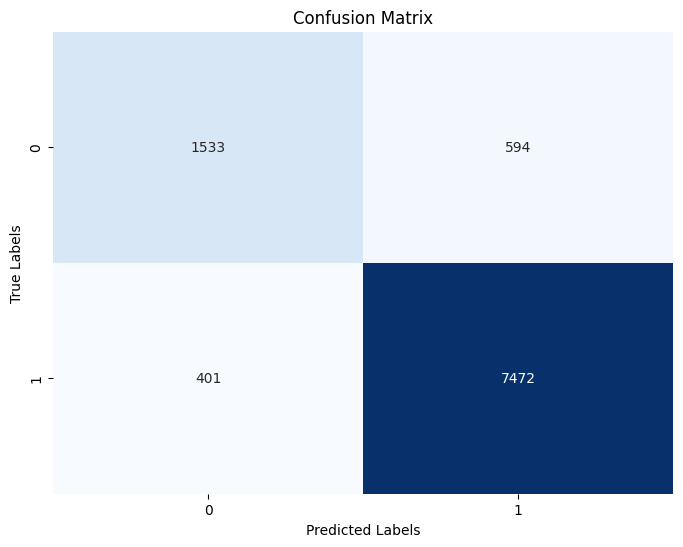

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
